<a href="https://colab.research.google.com/github/mevangelista-alvarado/CNVSMM/blob/main/EjemploDeDistPoisson_LineaMujeres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

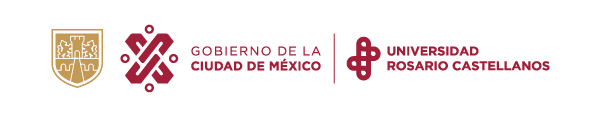

Actualizado: Julio de 2024

### Introducción

En este colab se busca utilizar una distribución de Poisson para hacer un estimado del numero de denuncias especializadas se recibiran en la fiscalia de la CDMX por mes.

A partir de la cantidad total de mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX por mes desde el año 2023, obtenida del sistema de datos abiertos del gobierno de la CDMX.




### Obtener los datos

Utilizaremos el conjunto de **Víctimas en carpetas de investigación FGJ** del  sistema de Datos abiertos del Gobierno de la Ciudad de México (Sistema Ajolote).

Para más información acerca del conjunto de datos puede visitar:
https://datos.cdmx.gob.mx/dataset/victimas-en-carpetas-de-investigacion-fgj


In [ ]:
import requests

def download_file(url, filename):
    # This method downloads a file from a URL containing a .txt, .csv, or .zip file,
    # for example, and saves it with the name of the filename variable.
    try:
      response = requests.get(url)
      if response.status_code == 200:
          with open(filename, 'wb') as file:
              file.write(response.content)
      print("Archivo descargado exitosamente.")
      return True
    except:
      print(f"No se pudo recuperar el archivo. Status code: {response.status_code}")
      return None


main_url = "https://archivo.datos.cdmx.gob.mx/FGJ/victimas/victimasFGJ_acumulado_2024_05.csv"
alternative_url = "https://gist.githubusercontent.com/mevangelista-alvarado/a5e68dbdab03723b63772d75d929769e/raw/f27f83037e33d9c8e5fc86d4b025e1301aded394/victimasFGJ_acumulado_2024_05.csv"
filename = "victimasFGJ_acumulado.csv"

if download_file(main_url, filename) is None:
    download_file(alternative_url, filename)

Archivo descargado exitosamente.


### Leemos el archivo

In [ ]:
import pandas as pd

df = pd.read_csv(filename)
df.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,tipo_persona,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
0,2019.0,Enero,2019-01-04,12:19:00,2018.0,Agosto,2018-08-29,12:00:00,FRAUDE,DELITO DE BAJO IMPACTO,...,FISICA,OFENDIDO,FUERO COMUN,GUADALUPE INN,Guadalupe Inn,ALVARO OBREGON,Álvaro Obregón,CDMX,19.36125,-99.18314
1,2019.0,Enero,2019-01-04,12:20:00,2018.0,Diciembre,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,VICTORIA DE LAS DEMOCRACIAS,Victoria De Las Democracias,AZCAPOTZALCO,Azcapotzalco,CDMX,19.47181,-99.16458
2,2019.0,Enero,2019-01-04,12:23:00,2018.0,Diciembre,2018-12-22,15:30:00,ROBO A TRANSEUNTE SALIENDO DEL BANCO CON VIOLE...,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,COPILCO UNIVERSIDAD ISSSTE,Copilco El Bajo,COYOACAN,Coyoacán,CDMX,19.33797,-99.18611
3,2019.0,Enero,2019-01-04,12:27:00,2019.0,Enero,2019-01-04,06:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,AGRÍCOLA PANTITLAN,Agricola Pantitlan,IZTACALCO,Iztacalco,CDMX,19.40327,-99.05983
4,2019.0,Enero,2019-01-04,12:35:00,2019.0,Enero,2019-01-03,20:00:00,ROBO DE MOTOCICLETA SIN VIOLENCIA,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,...,FISICA,VICTIMA,FUERO COMUN,PROGRESISTA,Progresista,IZTAPALAPA,Iztapalapa,CDMX,19.35480,-99.06324


Notamos la cantidad total

In [ ]:
df.shape

(1334344, 22)

Exploramos las columnas del dataframe

In [ ]:
df.columns

Index(['anio_inicio', 'mes_inicio', 'fecha_inicio', 'hora_inicio',
       'anio_hecho', 'mes_hecho', 'fecha_hecho', 'hora_hecho', 'delito',
       'categoria_delito', 'sexo', 'edad', 'tipo_persona', 'calidad_juridica',
       'competencia', 'colonia_hecho', 'colonia_catalogo', 'alcaldia_hecho',
       'alcaldia_catalogo', 'municipio_hecho', 'latitud', 'longitud'],
      dtype='object')

### Tratamiento de datos

#### Filtro por sexo

In [ ]:
df_mujeres = df[df['sexo'] == 'Femenino']
df_mujeres.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,tipo_persona,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
1,2019.0,Enero,2019-01-04,12:20:00,2018.0,Diciembre,2018-12-15,15:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,VICTORIA DE LAS DEMOCRACIAS,Victoria De Las Democracias,AZCAPOTZALCO,Azcapotzalco,CDMX,19.47181,-99.16458
5,2019.0,Enero,2019-01-04,12:38:00,2018.0,Octubre,2018-10-12,18:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,...,FISICA,OFENDIDO,FUERO COMUN,PUEBLO DE LOS REYES,Barrio Del Niño Jesus,COYOACAN,Coyoacán,CDMX,19.33537,-99.16016
6,2019.0,Enero,2019-01-04,12:40:00,2019.0,Enero,2019-01-04,08:30:00,ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA,DELITO DE BAJO IMPACTO,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,TOLTECA,Tolteca,ALVARO OBREGON,Álvaro Obregón,CDMX,19.39000,-99.19472
7,2019.0,Enero,2019-01-04,12:51:00,2018.0,Diciembre,2018-12-27,13:00:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,BANJIDAL,Banjidal,IZTAPALAPA,Iztapalapa,CDMX,19.35996,-99.13696
10,2019.0,Enero,2019-01-04,12:59:00,2018.0,Diciembre,2018-12-03,14:30:00,"PRODUCCIÓN, IMPRESIÓN, ENAJENACIÓN, DISTRIBUCI...",DELITO DE BAJO IMPACTO,...,FISICA,VICTIMA Y DENUNCIANTE,FUERO COMUN,UNIDAD PROFESIONAL ADOLFO LOPEZ MATEOS,Residencial La Escalera,GUSTAVO A. MADERO,Gustavo A. Madero,CDMX,19.50959,-99.13985


Notamos la cantidad total

In [ ]:
df_mujeres.shape

(529032, 22)

#### Filtramos por año

Convertimos la columna `fecha_alta` a un valor datetime

In [ ]:
df_mujeres["fecha_inicio"] = pd.to_datetime(df_mujeres['fecha_inicio'])

<ipython-input-42-b7eef53041e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mujeres["fecha_inicio"] = pd.to_datetime(df_mujeres['fecha_inicio'])


Filtramos el dataframe con valores mayores a 2023

In [ ]:
df_mujeres_23_24 = df_mujeres[(df_mujeres['fecha_inicio'].dt.year >= 2023)]

df_mujeres_23_24.head()

,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,tipo_persona,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud
974079,2023.0,Enero,2023-01-01,01:43:31,2022.0,Diciembre,2022-12-31,23:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,PENSIL SUR,Cuauhtemoc Pensil,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.445760,-99.195791
974082,2023.0,Enero,2023-01-01,01:56:15,2022.0,Diciembre,2022-12-31,14:00:00,AMENAZAS,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,XALTIPAC (SAN ANTONIO TECOMITL),Barrio Xaltipac,MILPA ALTA,Milpa Alta,CDMX,19.220606,-98.992957
974090,2023.0,Enero,2023-01-01,04:14:10,2023.0,Enero,2023-01-01,03:17:00,VIOLACION EQUIPARADA,VIOLACIÓN,...,FISICA,VICTIMA,FUERO COMUN,LEYES DE REFORMA 1A SECCIÓN,Leyes De Reforma 1a Seccion,IZTAPALAPA,Iztapalapa,CDMX,19.358233,-99.072112
974092,2023.0,Enero,2023-01-01,05:00:16,2023.0,Enero,2023-01-01,04:25:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,SANTA MARTHA ACATITLA NORTE,Santa Martha Acatitla Norte,IZTAPALAPA,Iztapalapa,CDMX,19.374889,-99.016194
974094,2023.0,Enero,2023-01-01,05:07:36,2023.0,Enero,2023-01-01,01:30:00,AMENAZAS,DELITO DE BAJO IMPACTO,...,FISICA,DENUNCIANTE Y VICTIMA,FUERO COMUN,SAN MATEO TLALTENANGO,Pueblo San Mateo Tlaltenango,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,CDMX,19.345436,-99.275737


Notamos la cantidad total

In [ ]:
df_mujeres_23_24.shape

(154751, 22)

### Datos Finales


Queremos obtener la cantidad total de mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX por mes desde el año 2023

Creamos un columna nueva que solo contega los valores de mes y año en el formato `AAAA-MM`

In [ ]:
df_mujeres_23_24['año_mes'] = df_mujeres_23_24['fecha_inicio'].dt.to_period('M')
df_mujeres_23_24.head()

<ipython-input-47-6cb03d6c5e22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mujeres_23_24['año_mes'] = df_mujeres_23_24['fecha_inicio'].dt.to_period('M')


,anio_inicio,mes_inicio,fecha_inicio,hora_inicio,anio_hecho,mes_hecho,fecha_hecho,hora_hecho,delito,categoria_delito,...,calidad_juridica,competencia,colonia_hecho,colonia_catalogo,alcaldia_hecho,alcaldia_catalogo,municipio_hecho,latitud,longitud,año_mes
974079,2023.0,Enero,2023-01-01,01:43:31,2022.0,Diciembre,2022-12-31,23:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,...,DENUNCIANTE Y VICTIMA,FUERO COMUN,PENSIL SUR,Cuauhtemoc Pensil,MIGUEL HIDALGO,Miguel Hidalgo,CDMX,19.445760,-99.195791,2023-01
974082,2023.0,Enero,2023-01-01,01:56:15,2022.0,Diciembre,2022-12-31,14:00:00,AMENAZAS,DELITO DE BAJO IMPACTO,...,DENUNCIANTE Y VICTIMA,FUERO COMUN,XALTIPAC (SAN ANTONIO TECOMITL),Barrio Xaltipac,MILPA ALTA,Milpa Alta,CDMX,19.220606,-98.992957,2023-01
974090,2023.0,Enero,2023-01-01,04:14:10,2023.0,Enero,2023-01-01,03:17:00,VIOLACION EQUIPARADA,VIOLACIÓN,...,VICTIMA,FUERO COMUN,LEYES DE REFORMA 1A SECCIÓN,Leyes De Reforma 1a Seccion,IZTAPALAPA,Iztapalapa,CDMX,19.358233,-99.072112,2023-01
974092,2023.0,Enero,2023-01-01,05:00:16,2023.0,Enero,2023-01-01,04:25:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,...,DENUNCIANTE Y VICTIMA,FUERO COMUN,SANTA MARTHA ACATITLA NORTE,Santa Martha Acatitla Norte,IZTAPALAPA,Iztapalapa,CDMX,19.374889,-99.016194,2023-01
974094,2023.0,Enero,2023-01-01,05:07:36,2023.0,Enero,2023-01-01,01:30:00,AMENAZAS,DELITO DE BAJO IMPACTO,...,DENUNCIANTE Y VICTIMA,FUERO COMUN,SAN MATEO TLALTENANGO,Pueblo San Mateo Tlaltenango,CUAJIMALPA DE MORELOS,Cuajimalpa de Morelos,CDMX,19.345436,-99.275737,2023-01


Contamos las ocurrencias por mes.

In [ ]:
df_mujeres_23_24_por_mes = df_mujeres_23_24['año_mes'].value_counts()
df_mujeres_23_24_por_mes

año_mes
2023-03    10322
2023-06     9872
2023-05     9746
2024-05     9619
2023-10     9543
2023-08     9384
2023-07     9352
2024-03     9311
2023-04     9198
2024-04     9087
2023-09     8937
2023-02     8820
2023-01     8652
2024-02     8525
2023-11     8459
2024-01     8358
2023-12     7566
Freq: M, Name: count, dtype: int64

Ordenamos por mes y año

In [ ]:
df_mujeres_23_24_por_mes = df_mujeres_23_24_por_mes.sort_index()
df_mujeres_23_24_por_mes

año_mes
2023-01     8652
2023-02     8820
2023-03    10322
2023-04     9198
2023-05     9746
2023-06     9872
2023-07     9352
2023-08     9384
2023-09     8937
2023-10     9543
2023-11     8459
2023-12     7566
2024-01     8358
2024-02     8525
2024-03     9311
2024-04     9087
2024-05     9619
Freq: M, Name: count, dtype: int64

Convertir la serie `df_mujeres_23_24_por_mes` a un dataframe

In [ ]:
df = df_mujeres_23_24_por_mes.reset_index()
# Renombrar las columnas
df.columns = ['año_mes', 'total']
df

,año_mes,total
0,2023-01,8652
1,2023-02,8820
2,2023-03,10322
3,2023-04,9198
4,2023-05,9746
5,2023-06,9872
6,2023-07,9352
7,2023-08,9384
8,2023-09,8937
9,2023-10,9543


### Conclusiones

Del dataframe anterior `df` podemos obtener los valores totales de la cantidad total de mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX por mes desde el año 2023.

In [ ]:
total = df.total.tolist()
total

[8652,
 8820,
 10322,
 9198,
 9746,
 9872,
 9352,
 9384,
 8937,
 9543,
 8459,
 7566,
 8358,
 8525,
 9311,
 9087,
 9619]

Con los datos obtenidos, procedemos a realizar un modelado a través de la distribución de Poisson.

Definimos X = \{Número de mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX por mes\}.

Primero procedemos a calcular el valor medio de ocurrencia:

# Calcular la media con NumPy en Python

In [ ]:
import numpy as np

data = [8652, 8820, 10322, 9198, 9746, 9872, 9352, 9384, 8937, 9543, 8459, 7566, 8358, 8525, 9311, 9087, 9619]

# Calcula la media utilizando la función mean() de NumPy
mean = np.mean(data)

print("Media:", mean)

Media: 9103.0


  Lo que nos dice que en promedio acuden 9103 mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX por mes.

  Podemos hacer calculos de probabilidades para saber cuantas mujeres podrían acudir a la fiscalia el proximo mes.

  Por ejemplo: 1. ¿Cuál es la probabilidad de que acudan más de 9,300 mujeres a pedir cualquier tipo de ayuda a la fiscalía de la CDMX?



In [ ]:
from scipy.stats import poisson

# Parámetros
lambda_param = 9103  # tasa de ocurrencia media (λ)
k = 9300  # número de eventos

# Calcular la probabilidad acumulada
probabilidad_mas_de_k = 1 - poisson.cdf(k, lambda_param)
print(f"La probabilidad de que ocurran más de {k} eventos es {probabilidad_mas_de_k:.4f}")


La probabilidad de que ocurran más de 9300 eventos es 0.0195


2. ¿Cuál es la probabilidad de que acudan menos de 9,200 mujeres a pedir cualquier tipo de ayuda a la fiscalía de la CDMX?

In [ ]:
from scipy.stats import poisson

# Parámetros
lambda_param = 9103  # tasa de ocurrencia media (λ)
k = 9200  # número de eventos

# Calcular la probabilidad acumulada
probabilidad_acumulada = poisson.cdf(k, lambda_param)
print(f"La probabilidad de que ocurran {k} o menos eventos es {probabilidad_acumulada:.4f}")

La probabilidad de que ocurran 9200 o menos eventos es 0.8466


3. ¿Cuál es la probabilidad de que acudan entre 8900 y 9100 mujeres a pedir cualquier tipo de ayuda a la fiscalía de la CDMX?

In [ ]:
from scipy.stats import poisson

# Parámetros
lambda_param = 9103  # tasa de ocurrencia media (λ)
k1 = 8900  # límite inferior
k2 = 9100  # límite superior

# Calcular la probabilidad
probabilidad_entre_k1_y_k2 = poisson.cdf(k2, lambda_param) - poisson.cdf(k1 - 1, lambda_param)
print(f"La probabilidad de que ocurran entre {k1} y {k2} eventos es {probabilidad_entre_k1_y_k2:.4f}")

La probabilidad de que ocurran entre 8900 y 9100 eventos es 0.4740


4. Podemos hace una gráfica de las probabilidades:

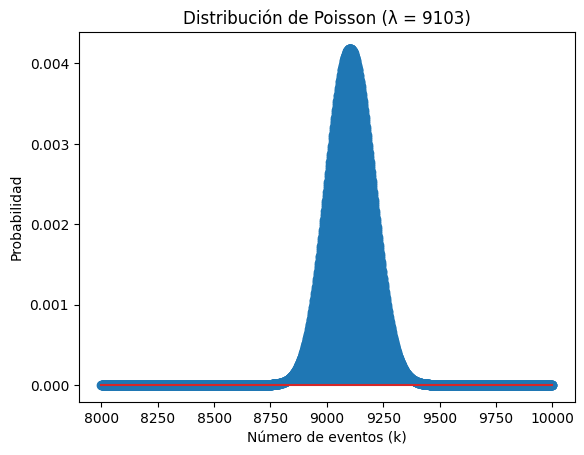

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parámetros
lambda_param = 9103  # tasa de ocurrencia media (λ)
k_values = np.arange(8000, 10000)  # rango de valores de k

# Calcular la probabilidad para cada valor de k
probabilidades = poisson.pmf(k_values, lambda_param)

# Crear el gráfico
plt.stem(k_values, probabilidades)
plt.xlabel('Número de eventos (k)')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson (λ = 9103)')
plt.show()

5. Finalmnte podemos hacer simulaciones para hacer un aproximado del total de mujeres que piden cualquier tipo de ayuda a la fiscalía de la CDMX para un año.

In [ ]:
import numpy as np

# Parámetros
lambda_param = 1903  # tasa de ocurrencia media (λ)
size = 12  # número de muestras a generar

# Generar números aleatorios
muestras = np.random.poisson(lambda_param, size)
print(f"Valores generados: {muestras}")


Valores generados: [1831 1933 1908 2040 1892 1888 1871 1913 1932 1866 1903 1931]
